<a href="https://colab.research.google.com/github/CreativeBrian/AI-Projects/blob/main/TermProject_TwitterSentimentAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This is a sentiment analysis program that parses tweets fetched from twitter using Python

In [ ]:
# Import the libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Twitter API Credentials
consumer_key="QTYW1u6Pu6Z5ZUDTO7QhJx4ed"
consumer_secret="QRqUwSnz9PEe0nZDbsgICa8XfoFKZJCfvt8cUBELKzJ0lmtdgC"
access_token="1113048193997123584-96R7jkMGMjonhAQWVRyCFpQsMKrs2m"
access_token_secret="KWHjKlCh6kbGJ7IRkmiBQ7wRHEuAYZOsjLw4jrR4GSNq9"

#Create the authentication object
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
#Set the access token and access token secret
auth.set_access_token(access_token, access_token_secret)
#Create the API object while passing in the auth information
api = tweepy.API(auth, wait_on_rate_limit = True) 

In [ ]:
#Extract 1000 tweets from the twitter user 
posts = api.user_timeline(screen_name ="Amazon",  count=1000, lang="en", tweet_mode="extended")

#Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
  print(str(i) + ')'+ tweet.full_text + '\n')
  i=i+1

Show the 5 recent tweets: 

1)@IamMilyna We're sorry for the poor experience! We'd like to help, but we need a bit more information. Without providing account and personal information, could you tell us more about what's going on? Please let us know! -Braden

2)@MeadManTim This isn't the experience we want or expect for you! You can learn more on how to improve search results here: https://t.co/eDeKgoqoaR. -Josue

3)@ithinkofdevilz Hello there! Thanks for bringing this to our attention. Please report this, and any other phishing correspondence, according to our Help page here: https://t.co/JUnrY8hZEG. Let us know if we can help with anything else! -Karina

4)@MyKuL8X8 We're sorry for the problems! To see available options, we recommend contacting the third-party seller here: https://t.co/SsGOmzG2p2. Please view this information on our Help pages here: https://t.co/kIwaycOglo. -Teri

5)@MyKuL8X8 We're sorry for the inconvenience! To see available options, we recommend contacting the thi

In [ ]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,@IamMilyna We're sorry for the poor experience...
1,@MeadManTim This isn't the experience we want ...
2,@ithinkofdevilz Hello there! Thanks for bringi...
3,@MyKuL8X8 We're sorry for the problems! To see...
4,@MyKuL8X8 We're sorry for the inconvenience! T...


In [ ]:
#Clean the text
#Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @mentions
  text = re.sub(r'#', '', text) #Removing the # symbol
  text = re.sub(r'RT[\s]+', '', text) #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link

  return text 

#Cleaning the text
df['Tweets']=  df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets
0,We're sorry for the poor experience! We'd lik...
1,This isn't the experience we want or expect f...
2,Hello there! Thanks for bringing this to our ...
3,We're sorry for the problems! To see availabl...
4,We're sorry for the inconvenience! To see ava...
...,...
195,_The_Corgi What a fun combo! Two potatoes and ...
196,"We've got your back! 😉🤜 🤛😎 OooOOOoo, what's t..."
197,Being kind is hard-CORE! 🍎 Thanks for Deliver...
198,Twins ordering too many pairs of two-toned toe...


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity (Positive/Negative)
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the two new columns
df

,Tweets,Subjectivity,Polarity
0,We're sorry for the poor experience! We'd lik...,0.5800,0.025000
1,This isn't the experience we want or expect f...,0.5000,0.500000
2,Hello there! Thanks for bringing this to our ...,0.2875,0.021875
3,We're sorry for the problems! To see availabl...,0.7000,-0.112500
4,We're sorry for the inconvenience! To see ava...,0.7000,-0.112500
...,...,...,...
195,_The_Corgi What a fun combo! Two potatoes and ...,0.6000,-0.019531
196,"We've got your back! 😉🤜 🤛😎 OooOOOoo, what's t...",0.0000,0.000000
197,Being kind is hard-CORE! 🍎 Thanks for Deliver...,0.5500,0.500000
198,Twins ordering too many pairs of two-toned toe...,0.5000,0.500000


<function matplotlib.pyplot.show>

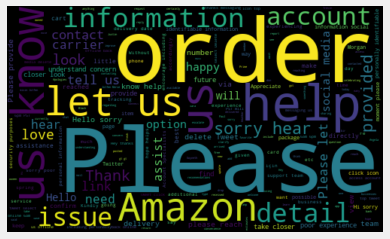

In [ ]:
#Plot word cloud for visualization
allWords = ''.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width =500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show


In [ ]:
 #Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']= df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,We're sorry for the poor experience! We'd lik...,0.5800,0.025000,Positive
1,This isn't the experience we want or expect f...,0.5000,0.500000,Positive
2,Hello there! Thanks for bringing this to our ...,0.2875,0.021875,Positive
3,We're sorry for the problems! To see availabl...,0.7000,-0.112500,Negative
4,We're sorry for the inconvenience! To see ava...,0.7000,-0.112500,Negative
...,...,...,...,...
195,_The_Corgi What a fun combo! Two potatoes and ...,0.6000,-0.019531,Negative
196,"We've got your back! 😉🤜 🤛😎 OooOOOoo, what's t...",0.0000,0.000000,Neutral
197,Being kind is hard-CORE! 🍎 Thanks for Deliver...,0.5500,0.500000,Positive
198,Twins ordering too many pairs of two-toned toe...,0.5000,0.500000,Positive


In [ ]:
# Print all the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== 'Positive'):
    print(str(j) + ')'+sortedDF['Tweets'][i])
    print()
    j = j+1

1) We're sorry for the poor experience! We'd like to help, but we need a bit more information. Without providing account and personal information, could you tell us more about what's going on? Please let us know! -Braden

2) This isn't the experience we want or expect for you! You can learn more on how to improve search results here:  -Josue

3) Hello there! Thanks for bringing this to our attention. Please report this, and any other phishing correspondence, according to our Help page here:  Let us know if we can help with anything else! -Karina

4)The question is:

Do you add one item to your cart and checkout, or do you wait until your cart is more full? 🤔

5)Dreading organizing that closet? 😒 

Don’t worry: Amazon has everything you need to spring into action 🧦🧹👡

6) This isn't the level of service we intend to provide! To ensure the best help possible, have you noticed a trend with a specific carrier when packages are delayed? If unsure, you can view the carrier in the tracking her

In [ ]:
#Print the Negative Tweets
# Print all the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== 'Negative'):
    print(str(j) + ')'+sortedDF['Tweets'][i])
    print()
    j = j+1

1) We're sorry for the problems! To see available options, we recommend contacting the third-party seller here:  Please view this information on our Help pages here:  -Teri

2) We're sorry for the inconvenience! To see available options, we recommend contacting the third-party seller here:  Please view this information on our Help pages here:  -Teri

3) We're sorry to hear about the poor experience. We'd like to escalate this to the appropriate team for further review. At your convenience, please send us as much detail as possible here:  Let us know once sent to confirm receipt. -Kristi

4) We're sorry to hear of the frustrating experience! It's possible one of the charges is an authorization. Learn more here:  We hope this helps. -Brielle

5) We understand your concern! For security purposes, we don't have account access via social media, but we'd still like to help! When you have a moment, please reach out to the carriers with the contact information that they provide here:  (1/2)

6

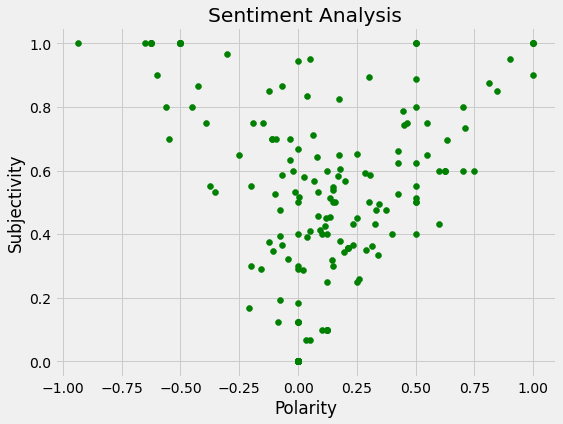

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Green')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#Get the percentage of Positive Tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

50.5

In [ ]:
#Get the percentage of Negative Tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0] *100), 1)

24.5

In [ ]:
# Show the Value Counts

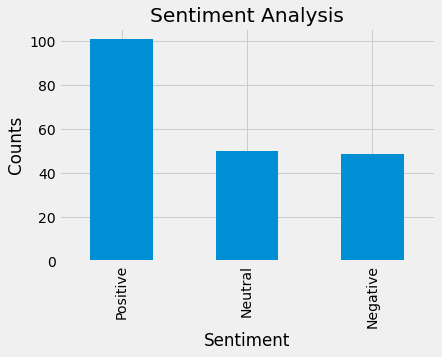

In [ ]:
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()